## Orbital elements and the state vectors

In [2]:
import numpy as np

mu = 398600.4418 # km^3/s^2

pi = np.pi
pi2 = 2*np.pi

### Example 4.3

In [4]:
r_vec = np.array([-6045, -3490, 2500])
print(f"r_vec = {r_vec} (km)")
v_vec = np.array([-3.457, 6.618, 2.533])
print(f"v_vec = {v_vec} (km/s)")

r_vec = [-6045 -3490  2500] (km)
v_vec = [-3.457  6.618  2.533] (km/s)


### Step 1

In [5]:
r = np.linalg.norm(r_vec) # magnitude of the position vector
print(f"r = {r} km")

r = 7414.318916798764 km


### Step 2

In [6]:
v = np.linalg.norm(v_vec) # magnitude of the velocity vector
print(f"v = {v} km/s")

v = 7.884469671449057 km/s


### Step 3

In [7]:
vr = np.dot(r_vec, v_vec)/r
print(f"vr = {vr} km/s")

vr = 0.5574679274498464 km/s


### Step 4

In [9]:
h_vec = np.cross(r_vec, v_vec) # vector angular momentum
print(f"h_vec = {h_vec} (km^2/s)")

h_vec = [-25385.17    6669.485 -52070.74 ] (km^2/s)


### Step 5

In [10]:
h = np.linalg.norm(h_vec) # magnitude of the angular momentum
print(f"h = {h} km^2/s")

h = 58311.66993185606 km^2/s


### Step 6

In [11]:
i = np.arccos(h_vec[2]/h) # inclination
print(f"i = {np.rad2deg(i)} deg")

i = 153.2492285182475 deg


### Step 7

In [12]:
# Defining the direction k and the Nodal vector
k_dir = np.array([0.0, 0.0, 1.0])

Nodal_vec = np.cross(k_dir, h_vec)
print(f"Nodal_vec = {Nodal_vec} (km^2/s)")

Nodal_vec = [ -6669.485 -25385.17       0.   ] (km^2/s)


### Step 8

In [13]:
Nodal = np.linalg.norm(Nodal_vec)
print(f"Nodal = {Nodal} km^2/s")

Nodal = 26246.692860132396 km^2/s


### Step 9

In [15]:
# Longitude of the ascending node

if Nodal_vec[1] >= 0.0:
    Omega = np.arccos(Nodal_vec[0]/Nodal)
else:
    Omega = pi2 - np.arccos(Nodal_vec[0]/Nodal)
    
print(f"\u03A9 = {np.rad2deg(Omega)} deg")

Ω = 255.27928533439618 deg


### Step 10

In [16]:
# Eccentricity vector
e_vec = np.cross(v_vec, h_vec)/mu - r_vec/r
print(f"e_vec = {e_vec}")

e_vec = [-0.09160385 -0.14220669  0.02644353]


### Step 11

In [17]:
e = np.sqrt(e_vec[0]**2 + e_vec[1]**2 + e_vec[2]**2)
print(f"e = {e}")

e = 0.1712111819541692


### Step 12

In [31]:
# Argument of the perigee
if e_vec[2] >= 0.0:
    w = np.arccos(np.dot(Nodal_vec,e_vec)/(Nodal*e))
else:
    w = pi2 - np.arccos(np.dot(Nodal_vec,e_vec)/(Nodal*e))
print(f"\u03C9 = {np.rad2deg(w)} deg")

ω = 20.068139973005433 deg


### Step 13

In [30]:
if np.dot(r_vec,v_vec) >= 0.0:
    theta = np.arccos(np.dot(e_vec,r_vec)/(e*r))
else:
    theta = pi2 - np.arccos(np.dot(e_vec,r_vec)/(e*r))
print(f"\u03B8 = {np.rad2deg(theta)} deg")

θ = 28.44580498419205 deg


### Semi-major axis

In [33]:
a = h**2/(mu*(1 - e**2))
print(f"a = {a} km")

a = 8788.081767279673 km


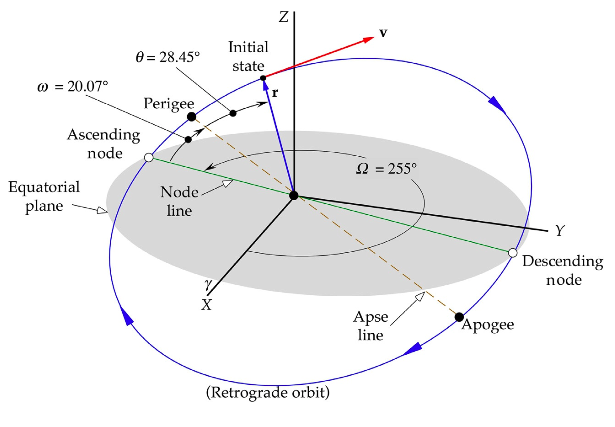

### Extra: Eccentric and Mean Anomaly

In [35]:
# Eccentric anomaly
Ea = np.arccos((e + np.cos(theta))/(1 + e*np.cos(theta)))
print(f"Ea = {np.rad2deg(Ea)} deg")

Ea = 24.07235859687544 deg


In [36]:
# Mean anomaly
Me = Ea - e*np.sin(Ea)
print(f"Me = {np.rad2deg(Me)} deg")

Me = 20.071088678782143 deg
